<a href="https://colab.research.google.com/github/vetri8838/phase2--project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("fake_news_sample_dataset.csv")

# Preview
print(df.head())

                                             title  \
0    NASA announces discovery of Earth-like planet   
1       Breaking: Celebrity endorses miracle cure!   
2     You won't believe what this politician said!   
3     Government plans to control weather revealed   
4  Government passes new environmental regulations   

                                                text  label  
0  NASA scientists revealed the discovery of a po...      1  
1  A popular celebrity claims a natural herb cure...      0  
2  A viral video shows a politician making contro...      0  
3  Leaked documents suggest a secret project aime...      0  
4  In an effort to combat climate change, new reg...      1  


In [ ]:
import re
import string

# Drop duplicates and nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Text preprocessing function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\[.*?\]', '', text)  # remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove links
    text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # remove punctuation
    text = re.sub(r'\n', '', text)  # remove line breaks
    return text

df['text'] = df['text'].apply(clean_text)

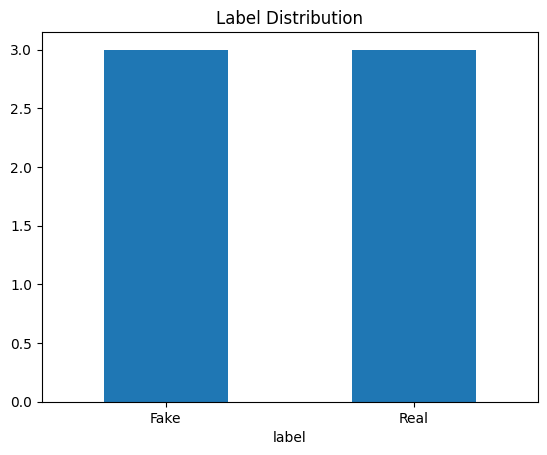

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Distribution of labels
df['label'].value_counts().plot(kind='bar', title="Label Distribution")
plt.xticks([0, 1], ['Fake', 'Real'], rotation=0)
plt.show()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Choose one model for evaluation
y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

Accuracy: 0.5
              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         1
        Real       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


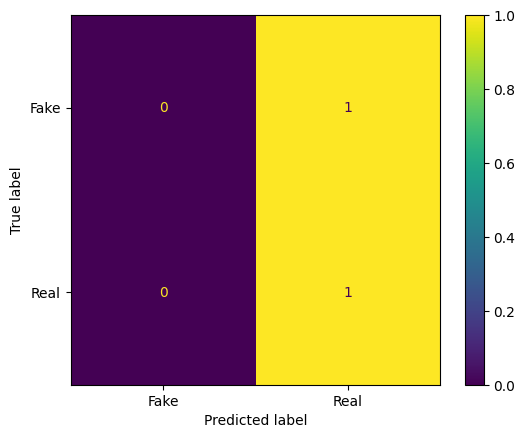

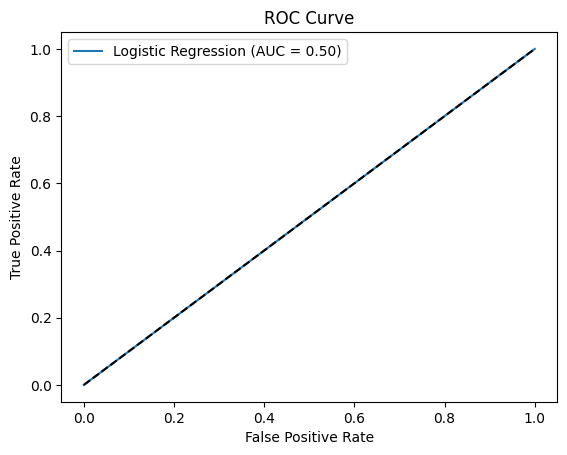

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot()
plt.show()

# ROC Curve
y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
